## mountaineer
**m**ountain **e**cology and **e**volution **r**evolution
##### A program to download, visualize, and compare species occurrence records across mountain ranges.

In [11]:
import mountaineer
import folium

## Load data
converted original .shp files to .geojson using geopandas

<AxesSubplot:>

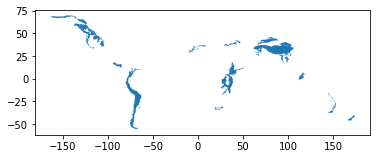

In [12]:
# "large-scale set" of mountain polygons (17 polygons represent largest continuous mountain ranges)
large = mountaineer.data.load('large')
large.plot()

<AxesSubplot:>

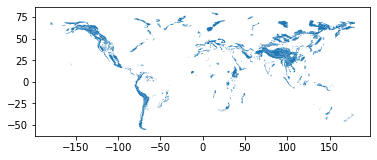

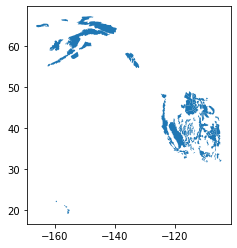

In [13]:
# Mountain polygons for "entire_world" (1,048 polygons)
world = mountaineer.data.load('world')
world.plot()
world[world.Country == "United States of America"].plot()

## Dataset and Region class objects

<AxesSubplot:>

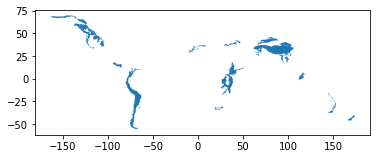

In [56]:
# create instance of Dataset class, which stores a list of Region class objects for each row in the GeoDataFrame
l = mountaineer.Dataset(large)
l.gdf.plot()

Hindukush-Himalaya


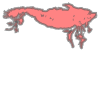

In [5]:
# view Region class by index (Himalaya)
print(l.regions[1].name)
l.regions[1].polygon

West Coast


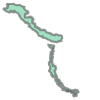

In [6]:
# view Region class by index (West Coast)
print(l.regions[12].name)
l.regions[12].polygon

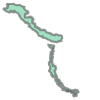

In [7]:
west_coast = l.regions[12]
west_coast.polygon

In [8]:
# load in geojson for world mountain regions
world = mountaineer.load('world')
world

Name                          Country  \
0                      Andes fueginos                 Argentina, Chile   
1       Coastal Range (Chile) - North                            Chile   
2     Coastal Range (Chile) - Central                            Chile   
3       Coastal Range (Chile) - South                            Chile   
4           Cordillera Patagonica Sur                 Argentina, Chile   
...                               ...                              ...   
1043                  Serra do Acarai                   Brazil, Guyana   
1044             Serra do Tumucumaque  Brazil, French Guiana, Suriname   
1045         Qaflankuh Mountain Range                             Iran   
1046                   Eshdeger Range                             Iran   
1047              Serranía de Macuira                         Colombia   

                                               geometry  
0     POLYGON ((-74.67966 -52.74396, -73.11284 -53.3...  
1     POLYGON ((-70.29936 -18.80892, -70.17639 -19.1...  
2     POLYGON ((-70.68959 -27.60910, -70.74517 -27.8...  
3     MULTIPOLYGON (((-73.09070 -36.94712, -72.88633...  
4     POLYGON ((-73.70162 -46.05717, -73.61354 -45.9...  
...                                                 ...  
1043  POLYGON ((-58.90928 1.38271, -58.84677 1.39243...  
1044  POLYGON ((-55.13338 3.00820, -55.26115 3.02892...  
1045  POLYGON ((48.17346 36.69134, 48.23437 36.68311...  
1046  POLYGON ((56.96070 34.03102, 57.13336 33.99994...  
1047  POLYGON ((-71.95908 11.71964, -72.00742 11.881...  

[1048 rows x 3 columns]

In [ ]:
# create instance of Dataset class for entire world
w = mountaineer.Dataset(world)
w.gdf.plot()
len(w.regions)

In [50]:
# filter Dataset.regions by country
w.filter_country("United States of America")

NameError: name 'sort' is not defined

In [11]:
# filter Dataset.regions by name
w.filter_name("Abajo Peak")

Name                   Country  \
905  Abajo Peak  United States of America   

                                              geometry  
905  POLYGON ((-110.15975 37.22858, -110.15813 37.3...

Abajo Peak


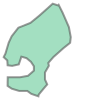

In [39]:
# select Region instance by index and store as new variable
abajo = w.regions[905]
print(abajo.name)
abajo.polygon

# Download species occurrences within Region

In [13]:
# get taxonKey info for taxon of interest
mountaineer.taxon_info('Lupinus argenteus')

[{'key': 2964374,
  'kingdom': 'Plantae',
  'phylum': 'Tracheophyta',
  'order': 'Fabales',
  'family': 'Fabaceae',
  'genus': 'Lupinus',
  'species': 'Lupinus argenteus',
  'kingdomKey': 6,
  'phylumKey': 7707728,
  'classKey': 220,
  'orderKey': 1370,
  'familyKey': 5386,
  'genusKey': 2963774,
  'speciesKey': 2964374,
  'parent': 'Lupinus',
  'parentKey': 2963774,
  'nubKey': 2964374,
  'scientificName': 'Lupinus argenteus Pursh',
  'canonicalName': 'Lupinus argenteus',
  'rank': 'SPECIES',
  'status': 'ACCEPTED',
  'higherClassificationMap': {'6': 'Plantae',
   '7707728': 'Tracheophyta',
   '220': 'Magnoliopsida',
   '1370': 'Fabales',
   '5386': 'Fabaceae',
   '2963774': 'Lupinus'},
  'synonym': False,
  'class': 'Magnoliopsida'},
 {'key': 7849788,
  'kingdom': 'Plantae',
  'phylum': 'Tracheophyta',
  'order': 'Fabales',
  'family': 'Fabaceae',
  'genus': 'Lupinus',
  'species': 'Lupinus argenteus',
  'kingdomKey': 6,
  'phylumKey': 7707728,
  'classKey': 220,
  'orderKey': 1370,


In [14]:
# query GBIF for 5 occurrences of 'Lupinus' within the complete polygon of this mountain range
abajo.get_occurrences(taxonKey=2963774, limit=5, tol=0)

{'offset': 0,
 'limit': 5,
 'endOfRecords': False,
 'count': 50,
 'results': [{'key': 2626284258,
   'datasetKey': '50c9509d-22c7-4a22-a47d-8c48425ef4a7',
   'publishingOrgKey': '28eb1a3f-1c15-4a95-931a-4af90ecb574d',
   'installationKey': '997448a8-f762-11e1-a439-00145eb45e9a',
   'publishingCountry': 'US',
   'protocol': 'DWC_ARCHIVE',
   'lastCrawled': '2021-04-11T09:06:38.023+00:00',
   'lastParsed': '2021-04-11T11:43:53.465+00:00',
   'crawlId': 259,
   'hostingOrganizationKey': '28eb1a3f-1c15-4a95-931a-4af90ecb574d',
   'extensions': {'http://rs.gbif.org/terms/1.0/Multimedia': [{'http://purl.org/dc/terms/format': 'image/jpeg',
      'http://purl.org/dc/terms/license': 'http://creativecommons.org/publicdomain/zero/1.0/',
      'http://purl.org/dc/terms/created': '2020-05-14T19:11:11Z',
      'http://purl.org/dc/terms/rightsHolder': 'Robb Hannawacker',
      'http://purl.org/dc/terms/type': 'StillImage',
      'http://rs.tdwg.org/dwc/terms/catalogNumber': '72929038',
      'http://

Done. Found 50 records


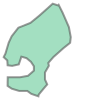

In [40]:
# query GBIF for all occurrences of 'Lupinus' within the complete polygon of this mountain range
a = abajo.get_all_occurrences(taxonKey=2963774, tol=0)
abajo.polygon

Done. Found 44 records


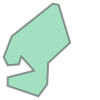

In [16]:
# query GBIF for all occurrences of 'Lupinus' within a simplified polygon of this mountain range (tol=0.05)
a = abajo.get_all_occurrences(taxonKey=2963774, tol=0.05)
abajo.polygon.simplify(tolerance=0.05)

Done. Found 23 records


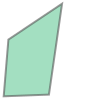

In [17]:
# query GBIF for all occurrences of 'Lupinus' within a simplified polygon of this mountain range (tol=0.5)
a = abajo.get_all_occurrences(taxonKey=2963774, tol=0.5)
abajo.polygon.simplify(tolerance=0.5)

In [18]:
# query GBIF for all occurrences of 'Plantae' within the complete polygon of this mountain range (tol=0)
a1 = abajo.get_all_occurrences(taxonKey=6, tol=0)

................Done. Found 4970 records


In [41]:
# convert to df and filter
df = abajo.convert_json_to_dataframe(a1)
df

kingdom        phylum    order    family    genus             species  \
0   Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus pusillus   
1   Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
2   Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
3   Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
4   Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
5   Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus pusillus   
6   Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus pusillus   
7   Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus caudatus   
8   Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus caudatus   
9   Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
10  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus caudatus   
11  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
12  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
13  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
14  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
15  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus pusillus   
16  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
17  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
18  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus caudatus   
19  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus caudatus   
20  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus caudatus   
21  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus caudatus   
22  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus pusillus   
23  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus pusillus   
24  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus  Lupinus ammophilus   
25  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus  Lupinus ammophilus   
26  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus pusillus   
27  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus pusillus   
28  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus pusillus   
29  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus caudatus   
30  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus  Lupinus ammophilus   
31  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus pusillus   
32  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus      Lupinus kingii   
33  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus caudatus   
34  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus  Lupinus ammophilus   
35  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus pusillus   
36  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus  Lupinus ammophilus   
37  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus  Lupinus ammophilus   
38  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
39  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
40  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
41  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
42  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus  Lupinus ammophilus   
43  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus      Lupinus kingii   
44  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus      Lupinus kingii   
45  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
46  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
47  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
48  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus   Lupinus argenteus   
49  Plantae  Tracheophyta  Fabales  Fabaceae  Lupinus    Lupinus caudatus   

     longitude   latitude  
0  -109.730509  38.112397  
1  -109.367208  37.8

In [20]:
# save DataFrame of occurrence records to csv
mountaineer.save(df, 'abajo_plantae.csv')

   kingdom        phylum        order        family         genus  \
0  Plantae  Tracheophyta  Asparagales  Asparagaceae         Yucca   
1  Plantae  Tracheophyta   Santalales     Viscaceae  Phoradendron   
2  Plantae  Tracheophyta      Rosales    Rhamnaceae      Frangula   
3  Plantae  Tracheophyta      Rosales  Elaeagnaceae    Shepherdia   
4  Plantae  Tracheophyta  Asparagales  Asparagaceae         Yucca   

                    species   longitude   latitude  \
0        Yucca angustissima -109.734496  37.509268   
1  Phoradendron juniperinum -109.734502  37.509217   
2      Frangula betulifolia -109.681015  37.552993   
3   Shepherdia rotundifolia -109.731144  37.525833   
4             Yucca baccata -109.730099  37.527427   

                      geometry  
0  POINT (-109.73450 37.50927)  
1  POINT (-109.73450 37.50922)  
2  POINT (-109.68102 37.55299)  
3  POINT (-109.73114 37.52583)  
4  POINT (-109.73010 37.52743)  


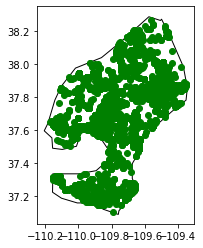

In [23]:
# plot occurrence records within Region
abajo.plot_with_mpl(df, region='Abajo Peak')

# Map with folium

In [18]:
# load 'world' dataset
world = mountaineer.load('world')

In [63]:
# init a map instance
fmap = folium.Map()

# create a layer to hold several features
region = folium.FeatureGroup(name="World")

# iterate over rows of 
for idx in world.index:
    
    # init a GeoJson object from each geometry datum and add to afghan layer
    data = folium.GeoJson(
        data=world.loc[idx, "geometry"],
        tooltip=world.loc[idx, "Name"],
    ).add_to(region)   
    
# add layer to the map
fmap.add_child(region)

# set bounds (location and zoom) on map to center on this region
fmap.fit_bounds(region.get_bounds())

# add layer toggle option
fmap.add_child(folium.LayerControl())

# show map
fmap

In [29]:
# Mountains in the U.S.

# init a map instance
fmap = folium.Map(tiles="Stamen Terrain")

# create a layer to hold several features
region = folium.FeatureGroup(name="U.S. Mountains")

# iterate over rows of 
for idx in world[world.Country == "United States of America"].index:
    
    # init a GeoJson object from each geometry datum and add to afghan layer
    data = folium.GeoJson(
        data=world.loc[idx, "geometry"],
        tooltip=world.loc[idx, "Name"],
    ).add_to(region)   
    
# add layer to the map
fmap.add_child(region)

# set bounds (location and zoom) on map to center on this region
fmap.fit_bounds(region.get_bounds())

# add layer toggle option
fmap.add_child(folium.LayerControl())

# show map
fmap

In [43]:
# Mountains in China

# init a map instance
fmap = folium.Map()

# create a layer to hold several features
region = folium.FeatureGroup(name="China")

# iterate over rows of 
for idx in world[world.Country == "China"].index:
    
    # init a GeoJson object from each geometry datum and add to afghan layer
    data = folium.GeoJson(
        data=world.loc[idx, "geometry"],
        tooltip=world.loc[idx, "Name"],
    ).add_to(region)   
    
# add layer to the map
fmap.add_child(region)

# set bounds (location and zoom) on map to center on this region
fmap.fit_bounds(region.get_bounds())

# add layer toggle option
fmap.add_child(folium.LayerControl())

# show map
fmap

### explicit use of Region class object (rather than creating list of regions with Dataset instance)

In [10]:
w.filter_name('Hengduan Shan')

Name Country                                           geometry
236  Hengduan Shan   China  POLYGON ((99.93899 27.03636, 99.97706 26.98877...

In [11]:
hengduan = w.regions[236]

In [13]:
hengduan = mountaineer.Region(name="Hengduan Shan", polygon=world.geometry[world.Name == "Hengduan Shan"])
hengduan

# Hengduan example

In [14]:
hengduan = w.regions[236]

In [ ]:
mountaineer.taxon_info('Pedicularis')

Done. Found 85 records


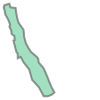

In [16]:
h = hengduan.get_all_occurrences(taxonKey=3171670, tol = 0.5)
hengduan.polygon

In [17]:
df = hengduan.convert_json_to_dataframe(h)
df

kingdom        phylum     order         family        genus  \
0   Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
1   Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
2   Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
3   Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
4   Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
..      ...           ...       ...            ...          ...   
80  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
81  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
82  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
83  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
84  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   

                         species  longitude   latitude  
0       Pedicularis trichoglossa  98.956389  28.497222  
1       Pedicularis trichoglossa  98.948611  28.479722  
2   Pedicularis pseudoversicolor  98.948611  28.479722  
3       Pedicularis likiangensis  98.948611  28.479722  
4           Pedicularis rupicola  98.948611  28.479722  
..                           ...        ...        ...  
80                           NaN  99.905548  26.537043  
81      Pedicularis trichoglossa  99.040000  28.870000  
82      Pedicularis likiangensis  99.040000  28.870000  
83      Pedicularis trichoglossa  99.480000  27.730000  
84      Pedicularis trichoglossa  99.480000  27.730000  

[85 rows x 8 columns]

In [52]:
mountaineer.save(df, 'hengduan_pedicularis')

   kingdom        phylum     order         family        genus  \
0  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
1  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
2  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
3  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   
4  Plantae  Tracheophyta  Lamiales  Orobanchaceae  Pedicularis   

                        species  longitude   latitude  \
0      Pedicularis trichoglossa  98.956389  28.497222   
1      Pedicularis trichoglossa  98.948611  28.479722   
2  Pedicularis pseudoversicolor  98.948611  28.479722   
3      Pedicularis likiangensis  98.948611  28.479722   
4          Pedicularis rupicola  98.948611  28.479722   

                    geometry  
0  POINT (98.95639 28.49722)  
1  POINT (98.94861 28.47972)  
2  POINT (98.94861 28.47972)  
3  POINT (98.94861 28.47972)  
4  POINT (98.94861 28.47972)  


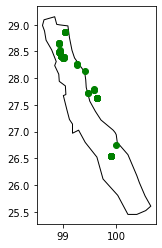

In [18]:
hengduan.plot_with_mpl(df, 'Hengduan Shan')

# Geographical vector objects
## https://eaton-lab.org/hack-the-planet/tutorials/25.1-folium-vectors.html

In [1]:
import folium
import geopandas
import shapely
import pyproj
import geojson

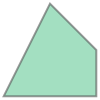

In [3]:
# create a Point instance
shapely.geometry.Point(44.0, -74.5)

# create a Polygon instance
shapely.geometry.Polygon([
    (44.0, -74), (45.0, -75), (45.0, -76), (43.0, -76),
])

In [4]:
# create two points
point1 = shapely.geometry.Point(44.0, -74.5)
point2 = shapely.geometry.Point(43.0, -73.5)

# get linear distance between points
linear_dist = point1.distance(point2)
print(f"linear unit-less distance: {linear_dist:.2f}")

linear unit-less distance: 1.41


In [5]:
# get geodetic (great circle) projection object
geod = pyproj.Geod(ellps='WGS84')

# get results of projecting points to new space
angle1, angle2, distance = geod.inv(point1.x, point1.y, point2.x, point2.y)

# print results (divide by 1000 to get in units of kms)
print(f"WGS84 distance in Kilometers: {distance / 1000:.2f}")

WGS84 distance in Kilometers: 115.77
